In [78]:
import numpy as np
import pandas as pd

from scipy.spatial.distance import cosine
from gensim.models import Word2Vec

In [100]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('bmh')

In [101]:
pd.options.display.max_rows = 1000

In [102]:
m1 = Word2Vec.load('../data/northeast.bin')

In [103]:
m2 = Word2Vec.load('../data/south.bin')

In [104]:
m1_vocab = set(m1.wv.vocab.keys())

In [105]:
m2_vocab = set(m2.wv.vocab.keys())

In [106]:
vocab = set.intersection(m1_vocab, m2_vocab)

In [107]:
vocab = sorted(vocab)

In [108]:
m1_m = np.stack([m1[t] for t in vocab])

In [109]:
m2_m = np.stack([m2[t] for t in vocab])

In [110]:
basevecs = m1_m - m1_m.mean(0)

In [111]:
othervecs = m2_m - m2_m.mean(0)

In [112]:
m = othervecs.T.dot(basevecs)

In [113]:
u, _, v = np.linalg.svd(m)

In [114]:
ortho = u.dot(v)

In [115]:
m2f = othervecs.dot(ortho)

In [116]:
data = []
for i, token in enumerate(vocab):
    c = m1.wv.vocab[token].count + m2.wv.vocab[token].count
    d = cosine(m1_m[i], m2f[i])
    data.append((token, c, d))

In [117]:
df = pd.DataFrame(data, columns=('token', 'count', 'distance'))

In [179]:
len(df[df['count'] > 1e4])

10988

In [168]:
df[df['count'] > 1e4].sort_values('distance', ascending=False).head(200)

,token,count,distance
10137,fornadine,13651,1.036916
401,#dream,20404,0.946814
1445,#taptapfish,31251,0.840285
1071,#opportunity,31156,0.835714
1136,#playingnow,15968,0.820826
678,#hope,23803,0.772987
1525,#trecru,27071,0.763743
4531,approx,19749,0.763241
990,#nc,23584,0.750650
791,#kcapinoystar,77227,0.748854


In [66]:
def compare(token):
    for t, _ in m1.most_similar(token, topn=20):
        print(t)
    print('\n')
    for t, _ in m2.most_similar(token, topn=20):
        print(t)

In [198]:
compare('beach')

boardwalk
lake
#beach
beaches
bahamas
wildwood
shore
seaside
marina
cove
mall
carnival
pond
nantucket
boat
venice
pool
hamptons
waterfront
inn


boardwalk
beaches
destin
pier
bahamas
riverwalk
lake
dunes
oceanfront
cove
#beach
inlet
seaside
island
#lovefl
shores
marina
springs
cay
poolside


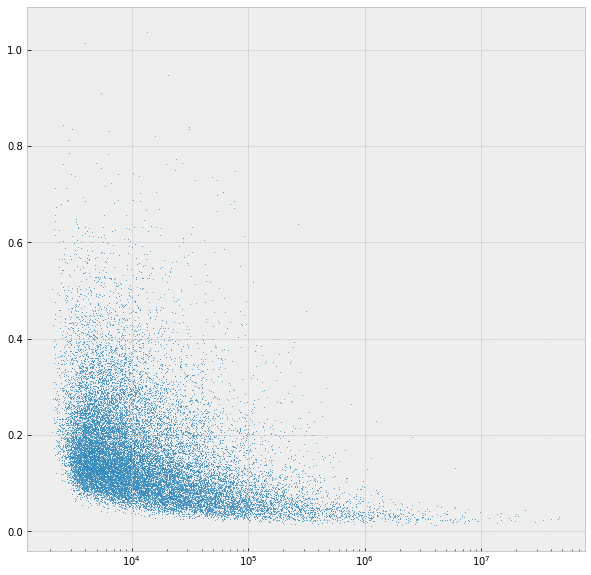

In [63]:
plt.figure(figsize=(10, 10))
plt.xscale('log')
plt.scatter(df['count'], df['distance'], s=0.2)